In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data = pd.read_csv("../input/petfinder-adoption-prediction/train/train.csv")

In [ ]:
train_data

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [ ]:
# Categorize them to OHE 
len(train_data.Breed1.unique())

176

In [ ]:
# 85% of animals are almost for free 
train_data.Fee.quantile(0.85)

1.0

In [ ]:
train_data.Description[0]

"Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care."

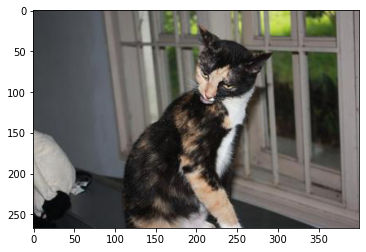

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../input/petfinder-adoption-prediction/train_images/b4d0c60b6-20.jpg')
plt.imshow(img)

In [ ]:
# 1- Tabular model: 0,   50%     :ANN 
# 2- ConvNet:       1,   60%     :Resnet, VGG16, ... 
# 3- NLP:           2,   80%     :Glove (we need to handle Malay and Chineses data)
# 4- Log Regr:      To predict the final label using the 3*5 features of the softmax outputs each multiplied by their accuracy 

## One Approach:
# p0 : output0 of the softmax
# (0.5*p0 + 0.6*p1 + 0.8*p2)/(0.5+0.6+0.8) = 1.15 -> 1

## Better Approach:
# Ensemble (Stacking)

## Sentiment
# Search for how people use the sentiment data.
# We can use the full document magnitude and score as additional tabular features.

In [ ]:
# The score of a document's sentiment indicates the overall emotion of a document.
# The magnitude of a document's sentiment indicates how much emotional content is present within the document
#     , and this value is often proportional to the length of the document.

# Sentiment	Sample Values
# Clearly Positive*	"score": 0.8, "magnitude": 3.0
# Clearly Negative*	"score": -0.6, "magnitude": 4.0
# Neutral	"score": 0.1, "magnitude": 0.0
# Mixed	"score": 0.0, "magnitude": 4.0

In [ ]:
# Neural Network
    #Extract Magnitude and score from json sentiment (done) 
    #Cleansing and preprocessing
    # ANN 

# Tabular Data

> ### Extracting Magnitude and score from sentiment json files by google's api

In [ ]:
import json
import os

magnitude_list = []
score_list = []
for pet_id in train_data.PetID:
    if os.path.exists(f'../input/petfinder-adoption-prediction/train_sentiment/{pet_id}.json'):
        input_file=open(f'../input/petfinder-adoption-prediction/train_sentiment/{pet_id}.json', 'r')
        json_decode=json.load(input_file)
        magn_score = json_decode['documentSentiment']
        magnitude_list.append(magn_score["magnitude"])
        score_list.append(magn_score["score"])
        continue
    magnitude_list.append(np.nan)
    score_list.append(np.nan)

In [ ]:
train_data['description_magnitude'] = magnitude_list
train_data['description_score'] = score_list

In [ ]:
train_data

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,description_magnitude,description_score
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2.4,0.3
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.7,-0.2
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,3.7,0.2
3,1,Miko,4,307,0,2,1,2,0,2,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.9,0.9
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,3.7,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,2.5,0.4
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,0.3,0.0
14990,2,Monkies,2,265,266,3,5,6,7,3,...,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,2.5,0.8
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,0.9,0.9


# Cleansing And Preprocessing

In [ ]:
train_data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,description_magnitude,description_score
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14442.000000,14442.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,...,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441,2.127628,0.280951
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,...,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265,2.036914,0.276766
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000,0.000000,-0.900000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000,0.800000,0.100000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.600000,0.300000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000,2.800000,0.400000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000,32.000000,0.900000


In [ ]:
train_data.isna().sum()

Type                        0
Name                     1257
Age                         0
Breed1                      0
Breed2                      0
Gender                      0
Color1                      0
Color2                      0
Color3                      0
MaturitySize                0
FurLength                   0
Vaccinated                  0
Dewormed                    0
Sterilized                  0
Health                      0
Quantity                    0
Fee                         0
State                       0
RescuerID                   0
VideoAmt                    0
Description                12
PetID                       0
PhotoAmt                    0
AdoptionSpeed               0
description_magnitude     551
description_score         551
dtype: int64

In [ ]:
def filling_na(df,col):
    return df[  df[col].notna()  ][col].sample(n=1).values[0]

train_data.description_magnitude = train_data.description_magnitude.fillna(filling_na(train_data,'description_magnitude'))
train_data.description_score = train_data.description_score.fillna(filling_na(train_data,'description_score'))

train_data.isna().sum()

Type                        0
Name                     1257
Age                         0
Breed1                      0
Breed2                      0
Gender                      0
Color1                      0
Color2                      0
Color3                      0
MaturitySize                0
FurLength                   0
Vaccinated                  0
Dewormed                    0
Sterilized                  0
Health                      0
Quantity                    0
Fee                         0
State                       0
RescuerID                   0
VideoAmt                    0
Description                12
PetID                       0
PhotoAmt                    0
AdoptionSpeed               0
description_magnitude       0
description_score           0
dtype: int64

In [ ]:
# Dropping name column
train_data.drop('Name',axis=1,inplace=True)

# We don't need the 12 rows with no description 
train_data.dropna(how='any',inplace=True)

In [ ]:
train_data.isna().sum()

Type                     0
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
RescuerID                0
VideoAmt                 0
Description              0
PetID                    0
PhotoAmt                 0
AdoptionSpeed            0
description_magnitude    0
description_score        0
dtype: int64

In [ ]:
train_data= train_data.sample(frac=1)

In [ ]:
train_data=train_data.reset_index().drop('index',axis=1)

In [ ]:
train_data.iloc[0:8392, :]['PetID']

0       0dca551f0
1       ab519bf92
2       375905770
3       b0278d962
4       1a2f33fec
          ...    
8387    d61dd6a6b
8388    c273ffe1e
8389    89c8b19eb
8390    2edd45e56
8391    f2bb56f7a
Name: PetID, Length: 8392, dtype: object

In [ ]:
full_train_data=train_data.loc[:, train_data.columns != 'AdoptionSpeed']

In [ ]:
full_train_labels=train_data.loc[:, train_data.columns == 'AdoptionSpeed']

# Train Test Split

In [ ]:
x_train= full_train_data.iloc[0:10490,:]
x_test= full_train_data.iloc[10490: ,:]
y_train= full_train_labels.iloc[0:10490,:]
y_test= full_train_labels.iloc[10490: ,:]

In [ ]:
y_test

,AdoptionSpeed
10490,1
10491,2
10492,1
10493,1
10494,3
...,...
14976,4
14977,2
14978,4
14979,0


In [ ]:
#0:8392
x_train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,description_magnitude,description_score
0,2,2,254,243,3,3,7,0,2,2,...,2,0,41401,0eb58d0e34d148e77e79fadd2460f393,0,"They are playful, yard potty trained and eatin...",0dca551f0,3.0,1.5,0.1
1,1,3,307,0,1,3,0,0,2,2,...,1,0,41326,df50955257fc1c20becdd3dc37eb9c3e,0,"Kelso is still a young puppy i found, he was s...",ab519bf92,2.0,3.3,0.5
2,1,2,0,26,2,2,0,0,2,1,...,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3.0,0.2,0.0
3,1,4,307,307,1,2,7,0,2,1,...,1,0,41401,b770bac0ca797cf1433c48a35d30c4cb,0,Healthy and active. Adopter bring him to vacci...,b0278d962,3.0,0.9,0.3
4,1,3,307,0,1,2,0,0,2,1,...,1,0,41326,5353488c3d8f421e0b18e96eebe4e39f,0,"Milo is gentle, loves attention and very obedi...",1a2f33fec,1.0,0.9,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10485,2,2,266,0,3,1,2,7,2,1,...,2,0,41326,2922723f8889855551615e8d22f1e0b4,0,Stray kittens from a tame mama stray cat who g...,092a37bcf,6.0,2.7,0.3
10486,2,2,265,265,2,6,7,0,1,2,...,1,0,41401,93dfc7e5d65f9772958c411eb3a8b53f,0,Little Red Bean is still waiting for her forev...,f205b0649,13.0,8.7,0.1
10487,2,36,265,0,2,6,7,0,2,2,...,1,0,41326,6588efd43dfb821d7da7a4a6969bd5f6,0,"She's very loving, always ready for a pat on t...",73a3a3b24,3.0,4.1,0.4
10488,2,5,264,301,2,1,4,7,3,1,...,1,0,41326,35ca0af7f781e96744e8371c35b07944,0,Daughter of Polpot and Nemo..She is manja also...,b80074591,2.0,0.9,0.9


In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(
#    full_train_data, full_train_labels, test_size=0.33)

# OHE

In [ ]:
from sklearn import preprocessing
#only shipping and item_condition_id can be one hot encoded

# Type: OHE
# Gender: OHE
# Color1,2,3: OHE
# MaturitySize: OHE
# FurLength: OHE
# Vaccinated Dewormed Sterilized Health:OHE

cat_cols = ['Type', 'Gender','Color1','Color2','Color3',
                                  'MaturitySize','FurLength','Vaccinated', 'Dewormed', 'Sterilized', 'Health']

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(drop = 'first')

# 2. FIT
enc.fit(pd.DataFrame( x_train[cat_cols]))

# 3. Transform
train_x_cat_encoded = pd.DataFrame(enc.transform(pd.DataFrame( x_train[cat_cols])).toarray())
test_x_cat_encoded = pd.DataFrame(enc.transform(pd.DataFrame( x_test[cat_cols])).toarray())

# Standardization

In [ ]:
# Age: Std scaler
# Quantity, Fee: Std scaler
# PhotoAmt,description_magnitude,description_score: Std scaler

num_cols_names = ['Age','Quantity','Fee','PhotoAmt','description_magnitude','description_score']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train[num_cols_names])
train_x_num_scaled= pd.DataFrame(scaler.transform(x_train[num_cols_names]), columns=num_cols_names )
test_x_num_scaled = pd.DataFrame(scaler.transform(x_test[num_cols_names]), columns=num_cols_names )

# Clustering Breeds 

In [ ]:
clustering_cols = ['Color1','Color2','Color3','MaturitySize','FurLength']

enc = preprocessing.OneHotEncoder(drop = 'first')
enc.fit(pd.DataFrame(x_train[clustering_cols] ))
clustering_x_train_encoding = pd.DataFrame(enc.transform(pd.DataFrame( x_train[clustering_cols])).toarray())
clustering_x_test_encoding = pd.DataFrame(enc.transform(pd.DataFrame( x_test[clustering_cols])).toarray())

In [ ]:
from sklearn.cluster import KMeans

# Clustering breed
kmeans = KMeans(n_clusters=10).fit(clustering_x_train_encoding)
#one hot encoding the labels of the classes
enc = preprocessing.OneHotEncoder(drop = 'first')
enc.fit(kmeans.labels_.reshape(-1,1))
#putting the labels 
clustered_breed_enc_train = pd.DataFrame(enc.transform(pd.DataFrame(kmeans.labels_.reshape(-1,1))).toarray())
clustered_breed_enc_test = pd.DataFrame(enc.transform(pd.DataFrame(kmeans.predict(clustering_x_test_encoding).reshape(-1,1))).toarray())

# Merging the OHE, standardized, and result of clustering cols

In [ ]:
# Merging the OHE, standardized, and result of clustering cols
x_train_merged = pd.merge(train_x_cat_encoded , train_x_num_scaled,right_index = True, left_index= True)
x_train_merged = pd.merge(x_train_merged , clustered_breed_enc_train,right_index = True, left_index= True)
x_train_merged

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9,...,description_score,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.623451,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.815810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.983266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.255071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10485,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.096179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10486,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.623451,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10487,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.455995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10488,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.255071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Merging the OHE, standardized, and result of clustering cols
x_test_merged = pd.merge(test_x_cat_encoded , test_x_num_scaled,right_index = True, left_index= True)
x_test_merged = pd.merge(x_test_merged  , clustered_breed_enc_test,right_index = True, left_index= True)
x_test_merged 

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9,...,description_score,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.455995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.623451,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.096179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.815810,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.255071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.983266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4488,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096179,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4489,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.263636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Encoding class labels (To be removed)

In [ ]:
# Encoding class labels
#enc = preprocessing.OneHotEncoder()
#enc.fit(y_train.to_numpy().reshape(-1,1))
#y_train_tabular_encoded = pd.DataFrame(enc.transform(pd.DataFrame(y_train.to_numpy().reshape(-1,1))).toarray())
#y_test_tabular_encoded = pd.DataFrame(enc.transform(pd.DataFrame(y_test.to_numpy().reshape(-1,1))).toarray())

# Modeling


In [ ]:
# Validation set
ANN_x_train= x_train_merged.iloc[0:8392,:]
ANN_x_val= x_train_merged.iloc[8392: ,:]
ANN_y_train= y_train.iloc[0:8392,:]
ANN_y_val= y_train.iloc[8392: ,:]

In [ ]:
ANN_y_val.shape

(2098, 1)

In [ ]:
from keras import models
from keras import layers
from keras.optimizers import Adam


def build_model():
    ANN_model = models.Sequential()
    ANN_model.add(layers.Dense(265, activation='relu',
                          input_shape=(ANN_x_train.shape[1],)))
    ANN_model.add(layers.Dense(128, activation='relu'))
    ANN_model.add(layers.Dense(128, activation='relu'))
    ANN_model.add(layers.Dense(64, activation='relu'))
    ANN_model.add(layers.Dense(64, activation='relu'))
    ANN_model.add(layers.Dense(32, activation='relu'))
    ANN_model.add(layers.Dense(32, activation='relu'))
    ANN_model.add(layers.Dense(16, activation='relu'))
    ANN_model.add(layers.Dense(16, activation='relu', name="ANN_feature_extractor_layer"))
    ANN_model.add(layers.Dense(1))
    ANN_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return ANN_model

In [ ]:
num_epochs = 10

ANN_model = build_model()
ANN_feature_extractor = keras.Model(
    inputs=ANN_model.inputs,
    outputs=ANN_model.get_layer(name="ANN_feature_extractor_layer").output,
)
ANN_history = ANN_model.fit(ANN_x_train, ANN_y_train,
                    validation_data=(ANN_x_val, ANN_y_val),
                    epochs=num_epochs, batch_size=64, verbose=1)

Epoch 1/10
132/132 [==============================] - 2s 5ms/step - loss: 3.1128 - mae: 1.4282 - val_loss: 1.3464 - val_mae: 0.9866
Epoch 2/10
132/132 [==============================] - 1s 5ms/step - loss: 1.3131 - mae: 0.9710 - val_loss: 1.3140 - val_mae: 0.9769
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 1.2412 - mae: 0.9437 - val_loss: 1.2750 - val_mae: 0.9582
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 1.2095 - mae: 0.9249 - val_loss: 1.2561 - val_mae: 0.9481
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 1.2016 - mae: 0.9249 - val_loss: 1.2656 - val_mae: 0.9425
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1631 - mae: 0.9042 - val_loss: 1.2513 - val_mae: 0.9354
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1366 - mae: 0.8887 - val_loss: 1.2892 - val_mae: 0.9584
Epoch 8/10
132/132 [==============================] - 0s 3ms/step - loss: 1.

# Plotting Learning Curve

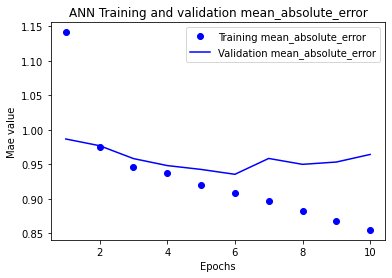

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mae_values = ANN_history.history['mae']
val_mae_values = ANN_history.history['val_mae']

epochs = range(1, len(mae_values) + 1)

plt.plot(epochs, mae_values, 'bo', label='Training mean_absolute_error')
plt.plot(epochs, val_mae_values, 'b', label='Validation mean_absolute_error')
plt.title('ANN Training and validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('Mae value')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def quadratic_kappa(actuals, preds, N=5):
    """This function calculates the Quadratic Kappa Metric used for Evaluation in the PetFinder competition
    at Kaggle. It returns the Quadratic Weighted Kappa metric score between the actual and the predicted values 
    of adoption rating."""
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[item]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[item]+=1
                         
    E = np.outer(act_hist, pred_hist);
    E = E/E.sum();
    O = O/O.sum();
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))


In [ ]:
# y_labels_ANN= np.argmax(ANN_y_val.to_numpy(),axis = 1)
# y_pred_ANN = np.argmax(ANN_model.predict(ANN_x_val),axis = 1)
# tabular_Kappa_Score= quadratic_kappa(y_labels_ANN, y_pred_ANN)
# tabular_Kappa_Score

# Dealing with images

In [ ]:
#Tasks
#form X and Y X->images from directory, Y->labels from table, resize images
#split into train and test
#load Resnet pretrained on imagenet
#test -> take the most voted class in all images of an example

# Save in directories

In [ ]:
# !rm -r /kaggle/working/split_data

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '../input/petfinder-adoption-prediction/train_images'

# The directory where we will
# store our smaller dataset
base_dir = './split_data'
try:
    os.mkdir(base_dir)
except:
    pass

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
    os.mkdir(validation_dir)
except:
    pass   
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    pass   


for obj in train_data.AdoptionSpeed.unique():
  # Directory with our training pictures
    train_dir = os.path.join(base_dir, 'train')
    train_dir = os.path.join(train_dir, str(obj))
    try:
        os.mkdir(train_dir)
    except:
        pass   

  # Directory with our validation pictures
    validation_dir = os.path.join(base_dir, 'validation')
    validation_dir = os.path.join(validation_dir, str(obj))
    try:
        os.mkdir(validation_dir)
    except:
        pass 
    
    # Directory with our test pictures
    test_dir = os.path.join(base_dir, 'test')
    test_dir = os.path.join(test_dir, str(obj))
    try:
        os.mkdir(test_dir)
    except:
        pass

In [ ]:
# Can be deleted after next cell?
CNN_x_train= x_train.iloc[0:8392,:]
CNN_x_val= x_train.iloc[8392: ,:]
CNN_y_train= y_train.iloc[0:8392,:]
CNN_y_val= y_train.iloc[8392: ,:]
#CNN_x_train, CNN_x_val, CNN_y_train , CNN_y_val = train_test_split(x_train, y_train, test_size=0.33)

In [ ]:
import shutil, sys
from tqdm import tqdm

# Copy train data to their own specified folders
for example in tqdm(range(len(CNN_x_train))):     
    row = CNN_x_train.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = CNN_y_train.iloc[example, :]['AdoptionSpeed']
    for img in range(int(imageamt)):
        fname = f'{petID}-{img+1}.jpg'
        
        train_dir = os.path.join(base_dir, 'train')
        train_dir = os.path.join(train_dir, str(label))

        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dir, fname)
        shutil.copyfile(src, dst)

        
# Copy validation data to their own specified folders
for example in tqdm(range(len(CNN_x_val))):     
    row = CNN_x_val.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = CNN_y_val.iloc[example, :]['AdoptionSpeed']
    for img in range(int(imageamt)):
        fname = f'{petID}-{img+1}.jpg'
        
        val_dir = os.path.join(base_dir, 'validation')
        val_dir = os.path.join(val_dir, str(label))

        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(val_dir, fname)
        shutil.copyfile(src, dst)
        

# Copy validation data to their own specified folders
for example in tqdm(range(len(x_test))):     
    row = x_test.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = y_test.iloc[example, :]['AdoptionSpeed']
    for img in range(int(imageamt)):
        fname = f'{petID}-{img+1}.jpg'
        
        test_dir = os.path.join(base_dir, 'test')
        test_dir = os.path.join(test_dir, str(label))

        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dir, fname)
        shutil.copyfile(src, dst)

100%|██████████| 4491/4491 [01:56<00:00, 38.53it/s]


In [ ]:
import gc
del CNN_x_train ,CNN_x_val   ,CNN_y_train ,CNN_y_val
gc.collect()

36434

# ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator



##############################3333#edit when changing the base model####################################################################
#from keras.applications.resnet50 import preprocess_input
from keras.applications.inception_v3 import preprocess_input
##############################3333#edit when changing the base model####################################################################


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
IMG_SIZE = 224

train_dir = os.path.join(base_dir, 'train')
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_dir = os.path.join(base_dir, 'validation')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode='categorical')

Found 32699 images belonging to 5 classes.
Found 8312 images belonging to 5 classes.


# Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Weights are modified here because of the loading troubles we should initialize with imagenet instead
IMG_SIZE = 224
conv_base = InceptionV3(weights=None,
                  include_top=False,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'conv5_block1_1_conv':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

CNN_model = models.Sequential()
CNN_model.add(conv_base)
CNN_model.add(layers.GlobalAveragePooling2D())
CNN_model.add(layers.Dense(256, activation='relu', name='CNN_feature_extractor_layer'))
CNN_model.add(layers.Dense(5, activation='softmax'))

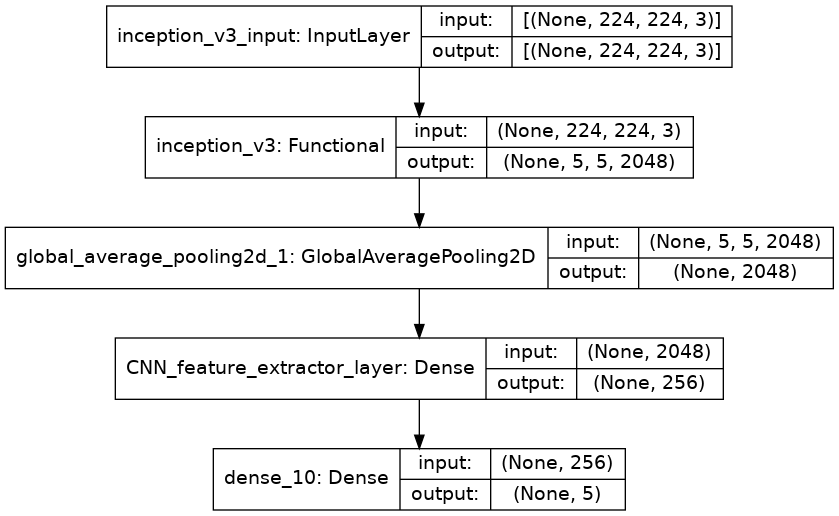

In [ ]:

plot_model(CNN_model, show_shapes=True, show_layer_names=True)

In [ ]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
CNN_feature_extractor_layer  (None, 256)               524544    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 1285      
Total params: 22,328,613
Trainable params: 22,294,181
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
CNN_model.compile(optimizer=optimizers.RMSprop(lr=1e-2),
               loss='categorical_crossentropy', metrics=['accuracy'])
CNN_feature_extractor = keras.Model(
    inputs=CNN_model.inputs,
    outputs=CNN_model.get_layer(name="CNN_feature_extractor_layer").output,
)

In [ ]:
CNN_history = CNN_model.fit_generator(
      train_generator,
      steps_per_epoch=33080//32,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=7898//32)

Epoch 1/2
1033/1033 [==============================] - 211s 193ms/step - loss: 2.8221 - accuracy: 0.2779 - val_loss: 1.4541 - val_accuracy: 0.2725


In [ ]:
CNN_model.save('/kaggle/working/CNN_model.h5')

# Plotting Learning Curve

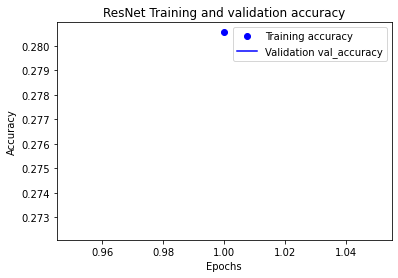

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mae_values = CNN_history.history['accuracy']
val_mae_values = CNN_history.history['val_accuracy']

epochs = range(1, len(mae_values) + 1)

plt.plot(epochs, mae_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_mae_values, 'b', label='Validation val_accuracy')
plt.title('ResNet Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# NLP Model

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = str(text).lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
trn_corpus = x_train['Description'].apply(normalize_text).tolist()
tst_corpus = x_test['Description'].apply(normalize_text).tolist()

In [ ]:
vocab_size = 10000

tok = Tokenizer(num_words=vocab_size, oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)

# Extract binary BoW features
x_train_NLP = tok.texts_to_sequences(trn_corpus)
x_test_NLP = tok.texts_to_sequences(tst_corpus)

y_train_NLP = np.asarray(y_train).astype('float32')

max_length = 100
x_train_NLP = pad_sequences(x_train_NLP, maxlen=max_length, padding='pre')
x_test_NLP = pad_sequences(x_test_NLP, maxlen=max_length, padding='pre')

In [ ]:
partial_x_train_NLP= x_train_NLP[0:8392,:]
x_val_NLP= x_train_NLP[8392: ,:]
partial_y_train_NLP= y_train_NLP[0:8392,:]
y_val_NLP= y_train_NLP[8392: ,:]

In [ ]:
from sklearn import preprocessing
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(partial_y_train_NLP)
# 3. Transform
#y_train_one_hot_encoded_NLP = pd.DataFrame(enc.transform(partial_y_train_NLP).toarray())
#y_val_one_hot_encoded_NLP = pd.DataFrame(enc.transform(y_val_NLP).toarray())

OneHotEncoder()

# Glove

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [ ]:
# max_length = 100
# vocab_sz = 10000 

# # load the whole embedding into memory
# embeddings_index = dict()
# f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()
# print('Loaded %s word vectors.' % len(embeddings_index))
# # create a weight matrix for words in training docs
# embedding_matrix = np.zeros((vocab_sz, 100))
# for word, i in tok.word_index.items():
#     if i == vocab_sz:
#         break
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import LSTM

n_latent_factors = 100
LSTM_model = models.Sequential()
# LSTM_model.add(layers.Embedding(vocab_size, n_latent_factors, weights=[embedding_matrix], input_length=max_length, trainable=False))
LSTM_model.add(layers.Embedding(vocab_size, n_latent_factors, input_length=max_length, trainable=False))
LSTM_model.add(LSTM(100, return_sequences=True))
LSTM_model.add(LSTM(100))
LSTM_model.add(layers.Dense(100, activation='relu'))
LSTM_model.add(layers.Dense(16, activation='relu'))
LSTM_model.add(layers.Dense(16, activation='relu', name= 'LSTM_feature_extractor_layer'))
LSTM_model.add(layers.Dense(1))
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 100)          80400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1616      
_________________________________________________________________
LSTM_feature_extractor_layer (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
LSTM_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse', metrics=['mae'])

LSTM_feature_extractor = keras.Model(
    inputs=LSTM_model.inputs,
    outputs=LSTM_model.get_layer(name="LSTM_feature_extractor_layer").output)

LSTM_history = LSTM_model.fit(partial_x_train_NLP,
                    partial_y_train_NLP,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val_NLP, y_val_NLP))
history_dict = LSTM_history.history
history_dict.keys()

Epoch 1/30
17/17 [==============================] - 5s 79ms/step - loss: 3.8665 - mae: 1.6203 - val_loss: 1.3827 - val_mae: 1.0410
Epoch 2/30
17/17 [==============================] - 1s 39ms/step - loss: 1.4478 - mae: 1.0456 - val_loss: 1.3936 - val_mae: 1.0396
Epoch 3/30
17/17 [==============================] - 1s 38ms/step - loss: 1.4227 - mae: 1.0367 - val_loss: 1.4151 - val_mae: 1.0384
Epoch 4/30
17/17 [==============================] - 1s 38ms/step - loss: 1.4623 - mae: 1.0328 - val_loss: 1.3855 - val_mae: 1.0405
Epoch 5/30
17/17 [==============================] - 1s 38ms/step - loss: 1.3988 - mae: 1.0297 - val_loss: 1.4386 - val_mae: 1.0445
Epoch 6/30
17/17 [==============================] - 1s 38ms/step - loss: 1.4006 - mae: 1.0355 - val_loss: 1.3829 - val_mae: 1.0412
Epoch 7/30
17/17 [==============================] - 1s 38ms/step - loss: 1.4136 - mae: 1.0390 - val_loss: 1.4384 - val_mae: 1.0376
Epoch 8/30
17/17 [==============================] - 1s 39ms/step - loss: 1.4400 - m

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

# Plotting Learning Curve

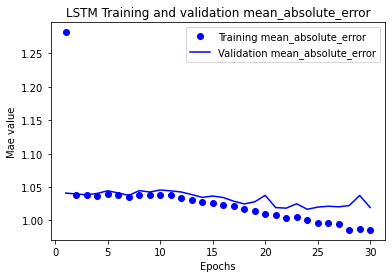

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mae_values = LSTM_history.history['mae']
val_mae_values = LSTM_history.history['val_mae']

epochs = range(1, len(mae_values) + 1)

plt.plot(epochs, mae_values, 'bo', label='Training mean_absolute_error')
plt.plot(epochs, val_mae_values, 'b', label='Validation mean_absolute_error')
plt.title('LSTM Training and validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('Mae value')
plt.legend()

plt.show()

In [ ]:
#y_labels_LSTM= np.argmax(y_val_one_hot_encoded.to_numpy(),axis = 1)
#y_pred_LSTM = np.argmax(LSTM_model.predict(x_val),axis = 1)
#Text_kappa_score= quadratic_kappa(y_labels_LSTM, y_pred_LSTM)
#Text_kappa_score

# Stacking the Three Models
## Tabular Data:
1- store the shuffed IDs which are input to the ANN model in an array

2- store the features output from model.pop.predict in an np array

3- convert the features np array to a pandas dataframe

## Text Data:
1- store the shuffed IDs which are input to the NLP model in an array

2- store the features output from model.pop.predict in an np array

3- convert the features np array to a pandas dataframe

## Images Data:
1- store the shuffed IDs which are input to the CNN model in an array

2- store the features output from model.pop.predict in an np array

3- convert the features np array to a pandas dataframe, then concatenate this dataframe with the corresponding shuffled IDs array

4- group by the ID, then average

### Left join the tabular features dataframe, with the text features dataframe and then the Images Features Dataframe

### Construct 2 layer NN with 1 dense output (regression)
   -loss_metric will be MSE, then we will perform model.predict() to get the predictions
   -then apply round() on these predictions, and make the maximum in the predictions array equals 4
   and the minimum is zero
   -then kappa(predictions_rounded, ground_truth_labels) and get the final score

# Extract ANN, NLP, and CNN Features From Train, Val, and Test sets 

### For ANN and LSTM models

In [ ]:
import tensorflow as tf
ANN_x_train_tensor= tf.convert_to_tensor(ANN_x_train.to_numpy())
LSTM_x_train_tensor= tf.convert_to_tensor(partial_x_train_NLP)

ANN_x_val_tensor= tf.convert_to_tensor(ANN_x_val.to_numpy())
LSTM_x_val_tensor= tf.convert_to_tensor(x_val_NLP)

ANN_x_test_tensor= tf.convert_to_tensor(x_test_merged.to_numpy())
LSTM_x_test_tensor= tf.convert_to_tensor(x_test_NLP)

In [ ]:
# Call feature extractor on train split input.
ANN_features = ANN_feature_extractor(ANN_x_train_tensor)
LSTM_features = LSTM_feature_extractor(LSTM_x_train_tensor)

# Call feature extractor on validation split input.
ANN_val_features = ANN_feature_extractor(ANN_x_val_tensor)
LSTM_val_features = LSTM_feature_extractor(LSTM_x_val_tensor)

# Call feature extractor on test split input.
ANN_test_features = ANN_feature_extractor(ANN_x_test_tensor)
LSTM_test_features = LSTM_feature_extractor(LSTM_x_test_tensor)

### For CNN model

In [ ]:
import cv2
import os
from tqdm import tqdm

# Storing Paths, labels, petIDs of training set
CNN_data= train_data.iloc[0:8392,:]

IMG_SIZE = 224
img_paths_CNN_train = []
labels_CNN_train = []
CNN_Train_Pet_IDs = []
for example in tqdm(range(len(CNN_data))):
    row = CNN_data.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = row['AdoptionSpeed']
    for i in range(int(imageamt)):
        img_path = f'../input/petfinder-adoption-prediction/train_images/{petID}-{i+1}.jpg'
        img_paths_CNN_train.append(img_path)    
        labels_CNN_train.append(label)
        CNN_Train_Pet_IDs.append(petID)

100%|██████████| 8392/8392 [00:01<00:00, 5363.08it/s]


In [ ]:
# Storing Paths, labels, petIDs of val set
CNN_val_data= train_data.iloc[8392:10490,:]

IMG_SIZE = 224
img_paths_CNN_val = []
labels_CNN_val = []
CNN_Val_Pet_IDs = []
for example in tqdm(range(len(CNN_val_data))):
    row = CNN_val_data.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = row['AdoptionSpeed']
    for i in range(int(imageamt)):
        img_path = f'../input/petfinder-adoption-prediction/train_images/{petID}-{i+1}.jpg'
        img_paths_CNN_val.append(img_path)    
        labels_CNN_val.append(label)
        CNN_Val_Pet_IDs.append(petID)

100%|██████████| 2098/2098 [00:00<00:00, 5394.11it/s]


In [ ]:
# Storing Paths, labels, petIDs of test set
CNN_test_data= train_data.iloc[10490:,:]

IMG_SIZE = 224
img_paths_CNN_test = []
labels_CNN_test = []
CNN_Test_Pet_IDs = []
for example in tqdm(range(len(CNN_test_data))):
    row = CNN_test_data.iloc[example, :]
    petID = row['PetID']
    imageamt = row['PhotoAmt']
    label = row['AdoptionSpeed']
    for i in range(int(imageamt)):
        img_path = f'../input/petfinder-adoption-prediction/train_images/{petID}-{i+1}.jpg'
        img_paths_CNN_test.append(img_path)    
        labels_CNN_test.append(label)
        CNN_Test_Pet_IDs.append(petID)

100%|██████████| 4491/4491 [00:00<00:00, 5379.79it/s]


### Data generator for CNN

In [ ]:
# Image generator function, takes paths of all images which it will generate
IMG_SIZE= 224
def img_generator(img_paths_CNN):
    returned_photo_count = 0
    j=0
    while returned_photo_count< len(img_paths_CNN):
        img_path = img_paths_CNN[returned_photo_count]
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = img[:,:, [2,1,0]]
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))/255
        returned_photo_count+=1
        j+=1
        if j>1:
            break
        yield tf.reshape(tf.convert_to_tensor(img), [1, 224, 224, 3])

In [ ]:
# Extracting train, val, and test features
batch_size = 1

def extract_features(sample_count, img_paths_CNN, labels_CNN):
    features = np.zeros(shape=(sample_count, 256))
    labels = np.zeros(shape=(sample_count,1))
    i = 0
    for i in tqdm(range(len(labels_CNN))):
        for a in img_generator(img_paths_CNN):
            CNN_features = CNN_feature_extractor(a)
        features[i * batch_size : (i + 1) * batch_size] = CNN_features
        labels[i * batch_size : (i + 1) * batch_size] = labels_CNN[i]
        i += 1
        if i * batch_size >= sample_count: 
            break
    return features, labels

## extract train features and save it

In [ ]:
import time
start_time = time.time()
CNN_train_features, CNN_train_labels_ = extract_features(len(img_paths_CNN_train)
                                                         ,img_paths_CNN_train,labels_CNN_train)
print("--- %s seconds ---" % (time.time() - start_time))

100%|█████████▉| 32698/32699 [43:01<00:00, 12.67it/s] 

--- 2581.6822516918182 seconds ---


In [ ]:
np.save('CNN_train_features.npy', CNN_train_features)
np.save('CNN_train_labels_.npy', CNN_train_labels_)

## extract val features and save it

In [ ]:
start_time = time.time()
CNN_val_features, CNN_val_labels_ = extract_features(len(img_paths_CNN_val)
                                                         ,img_paths_CNN_val,labels_CNN_val)
print("--- %s seconds ---" % (time.time() - start_time))

100%|█████████▉| 8311/8312 [10:48<00:00, 12.82it/s]

--- 648.3145134449005 seconds ---


In [ ]:
np.save('CNN_val_features.npy', CNN_val_features)
np.save('CNN_val_labels_.npy', CNN_val_labels_)

## extract test features and save it

In [ ]:
start_time = time.time()
CNN_test_features, CNN_test_labels_ = extract_features(len(img_paths_CNN_test)
                                                         ,img_paths_CNN_test,labels_CNN_test)
print("--- %s seconds ---" % (time.time() - start_time))

100%|█████████▉| 17270/17271 [21:01<00:00, 13.69it/s]

--- 1261.1389272212982 seconds ---


In [ ]:
np.save('CNN_test_features.npy', CNN_test_features)
np.save('CNN_test_labels_.npy', CNN_test_labels_)

## Training Features and labels

In [ ]:
# Creating dataframe for cnn features per image
CNN_Dataframe= pd.DataFrame(CNN_train_features)

# Adding the id of each image to group by later
CNN_Dataframe['Pet_IDs']= CNN_Train_Pet_IDs

# grouping by petID and averaging each pet's images features
CNN_features_averaged = CNN_Dataframe.groupby('Pet_IDs').mean().reset_index()

# Creating dataframes for ANN and LSTM to join later with averaged CNN dataframe
ANN_Dataframe= pd.DataFrame(ANN_features.numpy())
LSTM_Dataframe= pd.DataFrame(LSTM_features.numpy())

# Adding PetID to the ANN and LSTM dataframes to use later for joining
ANN_Dataframe['Pet_IDs']= train_data.iloc[0:8392, :].reset_index().drop('index', axis=1)['PetID']
LSTM_Dataframe['Pet_IDs']= train_data.iloc[0:8392, :].reset_index().drop('index', axis=1)['PetID']

# Joining The ANN, LSTM, and CNN features in on dataframe
All_features_train = pd.merge(ANN_Dataframe , LSTM_Dataframe ,on='Pet_IDs', how='left')
All_features_train = pd.merge(All_features_train , CNN_features_averaged ,on='Pet_IDs', how='left')

# For the pets with no images we add zeros in the place of average images featues
All_features_train = All_features_train.fillna(0)

# Dropping petID 
All_features_train.drop('Pet_IDs', axis=1, inplace=True)

# checking for the features' shapes
print('Train: ',All_features_train.shape)

# Getting The train, val, test labels
All_features_labels= train_data.iloc[0:8392, :]['AdoptionSpeed']

# checking for the labels' shapes
print('Train: ',All_features_labels.shape)

Train:  (8392, 288)
Train:  (8392,)


In [ ]:
All_features_train.to_csv('/kaggle/working/All_features_train.csv',index=False)
All_features_labels.to_csv('/kaggle/working/All_features_labels.csv',index=False)

In [ ]:
# All_features_train = pd.read_csv('/kaggle/working/All_features_train.csv')
# All_features_labels = pd.read_csv('/kaggle/working/All_features_labels.csv')

# Validation Features And Labels

In [ ]:
CNN_val_features = np.load('CNN_val_features.npy')

In [ ]:
# Creating dataframe for cnn features per image
CNN_Dataframe_val= pd.DataFrame(CNN_val_features)

# Adding the id of each image to group by later
CNN_Dataframe_val['Pet_IDs']= CNN_Val_Pet_IDs

# grouping by petID and averaging each pet's images features
CNN_features_averaged_val = CNN_Dataframe_val.groupby('Pet_IDs').mean().reset_index()

# Creating dataframes for ANN and LSTM to join later with averaged CNN dataframe
ANN_Dataframe_val= pd.DataFrame(ANN_val_features.numpy())
LSTM_Dataframe_val= pd.DataFrame(LSTM_val_features.numpy())


# Adding PetID to the ANN and LSTM dataframes to use later for joining
ANN_Dataframe_val['Pet_IDs']= train_data.iloc[8392:10490, :].reset_index().drop('index', axis=1)['PetID']
LSTM_Dataframe_val['Pet_IDs']= train_data.iloc[8392:10490, :].reset_index().drop('index', axis=1)['PetID']

# Joining The ANN, LSTM, and CNN features in on dataframe
All_features_val = pd.merge(ANN_Dataframe_val , LSTM_Dataframe_val ,on='Pet_IDs', how='left')
All_features_val = pd.merge(All_features_val , CNN_features_averaged_val ,on='Pet_IDs', how='left')

# For the pets with no images we add zeros in the place of average images featues
All_features_val = All_features_val.fillna(0)

# Dropping petID 
All_features_val.drop('Pet_IDs', axis=1, inplace=True)

# checking for the features' shapes
print('Val: ',All_features_val.shape)

# Getting The train, val, test labels
All_features_labels_val= train_data.iloc[8392:10490, :]['AdoptionSpeed']

# checking for the labels' shapes
print('Val: ',All_features_labels_val.shape)

Val:  (2098, 288)
Val:  (2098,)


In [ ]:
All_features_val.to_csv('/kaggle/working/All_features_val.csv',index=False)
All_features_labels_val.to_csv('/kaggle/working/All_features_labels_val.csv',index=False)

# Test Features And Labels

In [ ]:
# Creating dataframe for cnn features per image
CNN_Dataframe_test= pd.DataFrame(CNN_test_features)

# Adding the id of each image to group by later
CNN_Dataframe_test['Pet_IDs']= CNN_Test_Pet_IDs

# grouping by petID and averaging each pet's images features
CNN_features_averaged_test = CNN_Dataframe_test.groupby('Pet_IDs').mean().reset_index()

# Creating dataframes for ANN and LSTM to join later with averaged CNN dataframe
ANN_Dataframe_test= pd.DataFrame(ANN_test_features.numpy())
LSTM_Dataframe_test= pd.DataFrame(LSTM_test_features.numpy())

# Adding PetID to the ANN and LSTM dataframes to use later for joining
ANN_Dataframe_test['Pet_IDs']= train_data.iloc[10490:, :].reset_index().drop('index', axis=1)['PetID']
LSTM_Dataframe_test['Pet_IDs']= train_data.iloc[10490:, :].reset_index().drop('index', axis=1)['PetID']

# Joining The ANN, LSTM, and CNN features in on dataframe
All_features_test = pd.merge(ANN_Dataframe_test , LSTM_Dataframe_test ,on='Pet_IDs', how='left')
All_features_test = pd.merge(All_features_test , CNN_features_averaged_test ,on='Pet_IDs', how='left')

# For the pets with no images we add zeros in the place of average images featues
All_features_test = All_features_test.fillna(0)

# Dropping petID 
All_features_test.drop('Pet_IDs', axis=1, inplace=True)

# checking for the features' shapes
print('Test: ',All_features_test.shape)

# Getting The train, val, test labels
All_features_labels_test= train_data.iloc[10490:, :]['AdoptionSpeed']

# checking for the labels' shapes
print('Test: ',All_features_labels_test.shape)

Test:  (4491, 288)
Test:  (4491,)


In [ ]:
All_features_test.to_csv('/kaggle/working/All_features_test.csv',index=False)
All_features_labels_test.to_csv('/kaggle/working/All_features_labels_test.csv',index=False)

## Constructing the Final Model

In [ ]:
num_epochs= 20
def build_model():
    Final_model = models.Sequential()
    Final_model.add(layers.Dense(128, activation='relu',
                     input_shape=(All_features_train.shape[1],)))
    Final_model.add(layers.Dense(16, activation='relu'))
    Final_model.add(layers.Dense(1))
    Final_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return Final_model
Final_model= build_model()
Final_history = Final_model.fit(All_features_train,All_features_labels,
                                validation_data=(All_features_val, All_features_labels_val),
                                epochs=num_epochs, batch_size=64, verbose=1)

Epoch 1/20
132/132 [==============================] - 1s 4ms/step - loss: 2.2235 - mae: 1.1967 - val_loss: 1.2659 - val_mae: 0.9459
Epoch 2/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9662 - mae: 0.8233 - val_loss: 1.3446 - val_mae: 0.9623
Epoch 3/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9563 - mae: 0.8069 - val_loss: 1.3250 - val_mae: 0.9501
Epoch 4/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9537 - mae: 0.8003 - val_loss: 1.3101 - val_mae: 0.9440
Epoch 5/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9291 - mae: 0.7932 - val_loss: 1.3641 - val_mae: 0.9628
Epoch 6/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9294 - mae: 0.7880 - val_loss: 1.3313 - val_mae: 0.9453
Epoch 7/20
132/132 [==============================] - 0s 3ms/step - loss: 0.9278 - mae: 0.7854 - val_loss: 1.3356 - val_mae: 0.9536
Epoch 8/20
132/132 [==============================] - 0s 3ms/step - loss: 0.

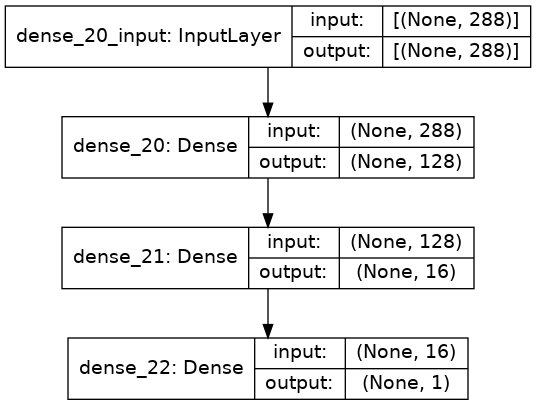

In [ ]:
plot_model(Final_model, show_shapes=True, show_layer_names=True)

# Plotting Learning Curve

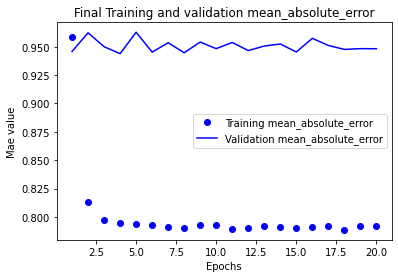

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mae_values = Final_history.history['mae']
val_mae_values = Final_history.history['val_mae']

epochs = range(1, len(mae_values) + 1)

plt.plot(epochs, mae_values, 'bo', label='Training mean_absolute_error')
plt.plot(epochs, val_mae_values, 'b', label='Validation mean_absolute_error')
plt.title('Final Training and validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('Mae value')
plt.legend()

plt.show()

In [ ]:
# Storing the models' predictions
Final_train_predictions= Final_model.predict(All_features_train)
Final_val_predictions= Final_model.predict(All_features_val)
Final_test_predictions= Final_model.predict(All_features_test)

In [ ]:
# Dicretizing Continuos output
discretize_cont = np.vectorize(lambda t:max(min(4,round(t)),0))

In [ ]:
# Getting the final train, val, and test predictions
Discretized_final_prediction_train= discretize_cont(np.array(Final_train_predictions)).squeeze()
Discretized_final_prediction_val= discretize_cont(np.array(Final_val_predictions)).squeeze()
Discretized_final_prediction_test= discretize_cont(np.array(Final_test_predictions)).squeeze()

In [ ]:
print('Training Kappa Score: ', round(quadratic_kappa(All_features_labels.to_numpy(), Discretized_final_prediction_train),2))
print('Validation Kappa Score: ', round(quadratic_kappa(All_features_labels_val, Discretized_final_prediction_val),2))
print('Testing Kappa Score: ', round(quadratic_kappa(All_features_labels_test, Discretized_final_prediction_test),2))

Training Kappa Score:  0.47
Validation Kappa Score:  0.23
Testing Kappa Score:  0.25


##### Validation: Go through the same pipeline as the training set 
##### Plot Learning Curves
##### Test split data: Go throught the same pipeline




##### Kaggle's Test Data: Go through the same pipeline and submit 